<div style="background:#222222; color:#ffffff; padding:20px">
    <h2 align="center">Deep Learning Fundamentals</h2>
    <h2 align="center" style="color:#01ff84">Regression: Exercise</h2>
<div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers

In [3]:
def genarate_data_1d(points, min, max, fn, noise, seed=0):
    np.random.seed(seed)
    x = np.random.uniform(low=min, high=max, size=(points, 1))
    np.random.seed(seed)
    y = fn(x[:,0]) + np.random.normal(scale=noise, size=points)
    return x, y

def plot(x, y, pred_x=None, pred_y=None, ax=plt):
    ax.plot(x, y, '.', label='data')
    if pred_x is not None:
        ax.plot(pred_x, pred_y, '.', color='r', label='our function')
    ax.legend();

<div style="background:#222222; color:#ffffff; padding:20px">
  <strong style="color:#01ff84">Exercise solved</strong>
  <p>Train a linear model to fit the data</p>
<div>

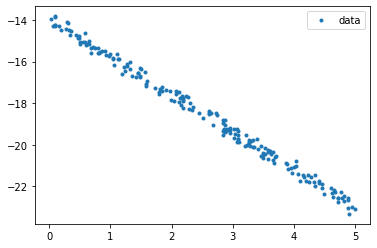

In [4]:
x,y = genarate_data_1d(points=200, min=0, max=5, fn=lambda x: -x*1.8 - 14, noise=0.2)
pred_x = np.linspace(start=-0.5, stop=5.5, num=100)
plot(x,y)

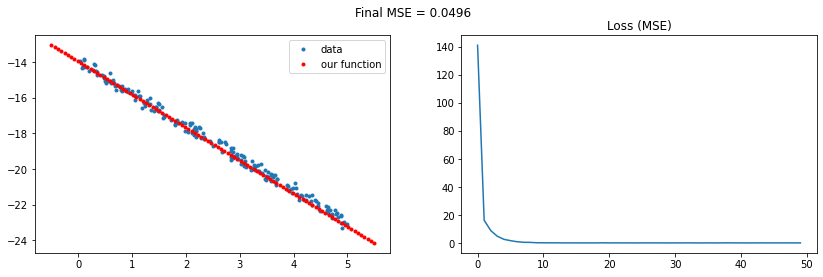

In [5]:
inp = keras.Input(shape=(1,))
out = layers.Dense(1, name='regression')(inp)
model = keras.Model(inputs=inp, outputs=out)

model.compile(loss='mse', optimizer=optimizers.SGD(0.1))
hist = model.fit(x, y, epochs=50, batch_size=32, verbose=0)

pred_y = model.predict(pred_x)

fig, (plot1, plot2) = plt.subplots(1, 2, figsize=(14,4))
fig.suptitle("Final MSE = "+ str(round(hist.history["loss"][-1],4)))
plot(x, y, pred_x, pred_y, ax=plot1)
plot2.plot(hist.history["loss"]); plot2.set_title("Loss (MSE)");

<div style="background:#222222; color:#ffffff; padding:20px">
  <strong style="color:#01ff84">Exercise 1</strong>
  <p>Train a MLP in less than 100 epochs to get a MSE lower than 0.1</p>
<div>

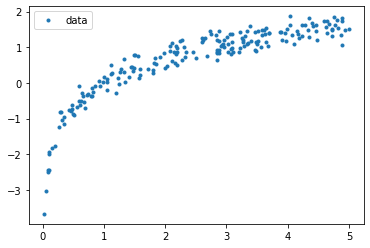

In [6]:
x,y = genarate_data_1d(points=200, min=0, max=5, fn=np.log, noise=0.2)
pred_x = np.linspace(start=-0.5, stop=5.5, num=100)
plot(x,y)

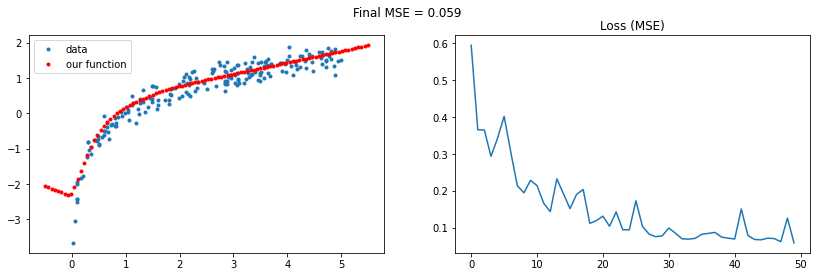

In [36]:
inp = keras.Input(shape=(1,))
hidden = layers.Dense(256, activation='relu')(inp)
hidden = layers.Dense(256, activation='relu')(hidden)
hidden = layers.Dense(128, activation='relu')(hidden)
hidden = layers.Dense(128, activation='relu')(hidden)

out = layers.Dense(1, name='regression')(hidden)
model = keras.Model(inputs=inp, outputs=out)

model.compile(loss='mse', optimizer=optimizers.SGD(0.05))
hist = model.fit(x, y, epochs=50, batch_size=32, verbose=0)

pred_y = model.predict(pred_x)

fig, (plot1, plot2) = plt.subplots(1, 2, figsize=(14,4))
fig.suptitle("Final MSE = "+ str(round(hist.history["loss"][-1],4)))
plot(x, y, pred_x, pred_y, ax=plot1)
plot2.plot(hist.history["loss"]); plot2.set_title("Loss (MSE)");
plt.show()

<div style="background:#222222; color:#ffffff; padding:20px">
  <strong style="color:#01ff84">Exercise 2</strong>
  <p>Train a MLP in less than 100 epochs to get a loss lower than 0.06</p>
<div>

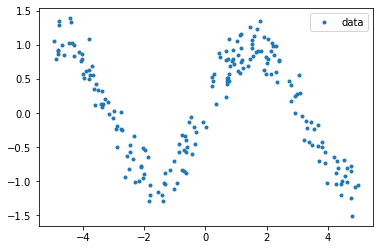

In [37]:
x,y = genarate_data_1d(points=200, min=-5, max=5, fn=np.sin, noise=0.2)
pred_x = np.linspace(start=-5.5, stop=5.5, num=100)

plot(x,y)

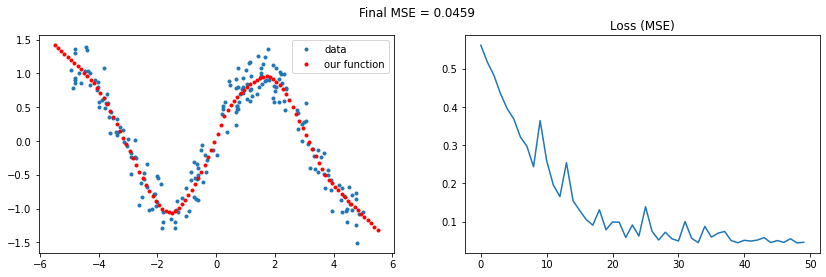

In [38]:
inp = keras.Input(shape=(1,))
hidden = layers.Dense(256, activation='relu')(inp)
hidden = layers.Dense(256, activation='relu')(hidden)
hidden = layers.Dense(128, activation='relu')(hidden)
hidden = layers.Dense(128, activation='relu')(hidden)

out = layers.Dense(1, name='regression')(hidden)
model = keras.Model(inputs=inp, outputs=out)

model.compile(loss='mse', optimizer=optimizers.SGD(0.05))
hist = model.fit(x, y, epochs=50, batch_size=32, verbose=0)

pred_y = model.predict(pred_x)

fig, (plot1, plot2) = plt.subplots(1, 2, figsize=(14,4))
fig.suptitle("Final MSE = "+ str(round(hist.history["loss"][-1],4)))
plot(x, y, pred_x, pred_y, ax=plot1)
plot2.plot(hist.history["loss"]); plot2.set_title("Loss (MSE)");
plt.show()

<div style="background:#222222; color:#ffffff; padding:20px">
  <strong style="color:#01ff84">Exercise 3</strong>
  <p>Train a MLP to fit the data.</p>
  <p>Hint: <strong style="color:#01ff84">Standard scale</strong> the data.</p>
<div>

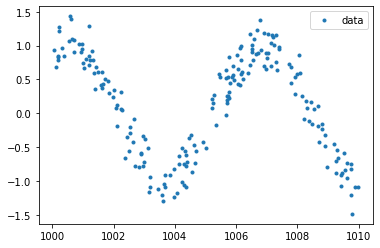

In [105]:
x,y = genarate_data_1d(points=200, min=1000, max=1010, fn=np.sin, noise=0.2)
pred_x = np.linspace(start=-2, stop=2, num=100)

plot(x,y)

In [106]:
from sklearn.preprocessing import StandardScaler, normalize, Normalizer

scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)
y_scaled = scaler.transform(y.reshape(-1,1))

#x_scaled = StandardScaler().fit_transform(x)
pred_x_scaled = scaler.transform(pred_x.reshape(-1,1))

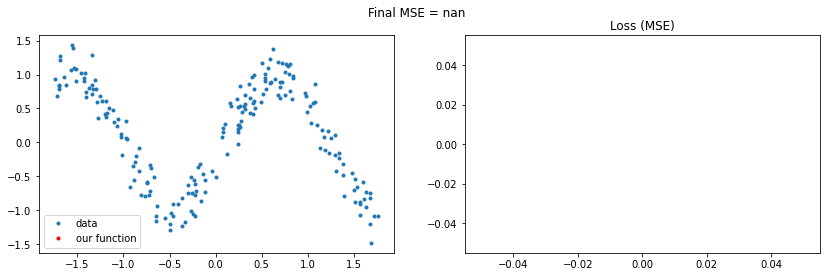

In [107]:


inp = keras.Input(shape=(1,))
hidden = layers.Dense(8, activation='relu')(inp)
hidden = layers.Dense(256, activation='relu')(hidden)
hidden = layers.Dense(128, activation='relu')(hidden)
hidden = layers.Dense(128, activation='relu')(hidden)

out = layers.Dense(1, name='regression')(hidden)
model = keras.Model(inputs=inp, outputs=out)

model.compile(loss='mse', optimizer=optimizers.SGD(0.001))
hist = model.fit(x_scaled, y_scaled, epochs=500, batch_size=32, verbose=0)

pred_y = model.predict(pred_x)

fig, (plot1, plot2) = plt.subplots(1, 2, figsize=(14,4))
fig.suptitle("Final MSE = "+ str(round(hist.history["loss"][-1],4)))
plot(x_scaled, y, pred_x, pred_y, ax=plot1)
plot2.plot(hist.history["loss"]); plot2.set_title("Loss (MSE)");
plt.show()

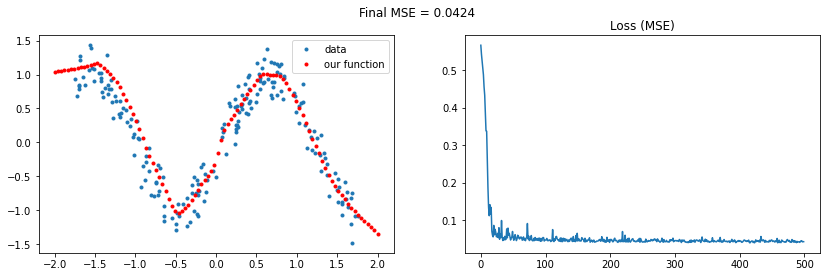

In [108]:
inp = keras.Input(shape=(1,))
hidden = layers.Dense(512, activation='relu')(inp)
hidden = layers.Dense(512, activation='relu')(hidden)
hidden = layers.Dense(512, activation='relu')(hidden)
hidden = layers.Dense(512, activation='relu')(hidden)
hidden = layers.Dense(512, activation='relu')(hidden)
hidden = layers.Dense(256, activation='relu')(hidden)

out = layers.Dense(1, name='regression')(hidden)
model = keras.Model(inputs=inp, outputs=out)

model.compile(loss='mse', optimizer=optimizers.SGD(0.05))
hist = model.fit(x_scaled, y, epochs=500, batch_size=32, verbose=0)

pred_y = model.predict(pred_x)

fig, (plot1, plot2) = plt.subplots(1, 2, figsize=(14,4))
fig.suptitle("Final MSE = "+ str(round(hist.history["loss"][-1],4)))
plot(x_scaled, y, pred_x, pred_y, ax=plot1)
plot2.plot(hist.history["loss"]); plot2.set_title("Loss (MSE)");
plt.show()

<div style="background:#222222; color:#ffffff; padding:20px">
  <strong style="color:#01ff84">Exercise 4</strong>
  <p>Train a MLP to fit the data</p>
<div>

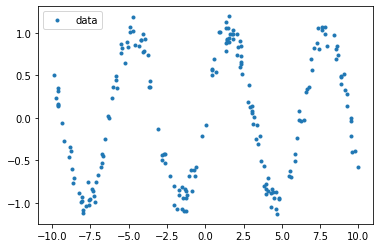

In [81]:
x,y = genarate_data_1d(points=200, min=-10, max=10, fn=np.sin,  noise=0.1)
pred_x = np.linspace(start=-2, stop=2, num=200)

plot(x,y)

In [89]:
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)
y_scaled = scaler.transform(y.reshape(-1,1))
pred_x_scaled = scaler.transform(pred_x.reshape(-1,1))

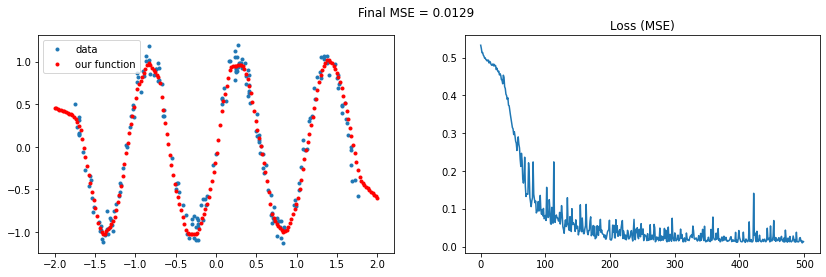

In [103]:
inp = keras.Input(shape=(1,))
hidden = layers.Dense(512, activation='relu')(inp)
hidden = layers.Dense(512, activation='relu')(hidden)
hidden = layers.Dense(512, activation='relu')(hidden)
hidden = layers.Dense(512, activation='relu')(hidden)
hidden = layers.Dense(512, activation='relu')(hidden)
hidden = layers.Dense(256, activation='relu')(hidden)

out = layers.Dense(1, name='regression')(hidden)
model = keras.Model(inputs=inp, outputs=out)

model.compile(loss='mse', optimizer=optimizers.SGD(0.05))
hist = model.fit(x_scaled, y, epochs=500, batch_size=32, verbose=0)

pred_y = model.predict(pred_x)

fig, (plot1, plot2) = plt.subplots(1, 2, figsize=(14,4))
fig.suptitle("Final MSE = "+ str(round(hist.history["loss"][-1],4)))
plot(x_scaled, y, pred_x, pred_y, ax=plot1)
plot2.plot(hist.history["loss"]); plot2.set_title("Loss (MSE)");
plt.show()

<div style="background:#222222; color:#ffffff; padding:20px">
  <strong style="color:#01ff84">Exercise 5</strong>
  <p>Train a MLP to fit the data</p>
<div>

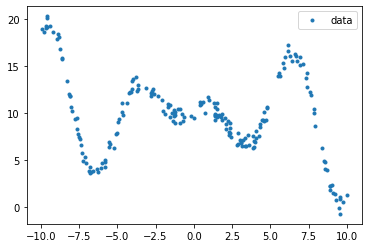

In [121]:
x,y = genarate_data_1d(points=200, min=-10, max=10, fn=lambda x: np.cos(x)*x+10, noise=0.5)
pred_x = np.linspace(start=-2, stop=2, num=200)

plot(x,y)

In [122]:
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)
y_scaled = scaler.transform(y.reshape(-1,1))
pred_x_scaled = scaler.transform(pred_x.reshape(-1,1))

In [125]:
x_scaled.min(), x_scaled.max()

(-1.7461017531847765, 1.7554950524356585)

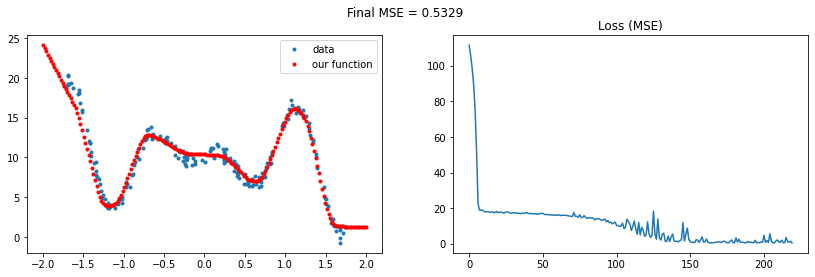

In [151]:
inp = keras.Input(shape=(1,))
hidden = layers.Dense(512, activation='relu')(inp)
hidden = layers.Dense(512, activation='relu')(hidden)
hidden = layers.Dense(512, activation='relu')(hidden)
hidden = layers.Dense(512, activation='relu')(hidden)
hidden = layers.Dense(512, activation='relu')(hidden)
hidden = layers.Dense(512, activation='relu')(hidden)
hidden = layers.Dense(512, activation='relu')(hidden)
hidden = layers.Dense(512, activation='relu')(hidden)
hidden = layers.Dense(512, activation='relu')(hidden)


out = layers.Dense(1, name='regression')(hidden)
model = keras.Model(inputs=inp, outputs=out)

model.compile(loss='mse', optimizer=optimizers.SGD(0.001))
hist = model.fit(x_scaled, y, epochs=220, batch_size=32, verbose=0)

pred_y = model.predict(pred_x)

fig, (plot1, plot2) = plt.subplots(1, 2, figsize=(14,4))
fig.suptitle("Final MSE = "+ str(round(hist.history["loss"][-1],4)))
plot(x_scaled, y, pred_x, pred_y, ax=plot1)
plot2.plot(hist.history["loss"]); plot2.set_title("Loss (MSE)");
plt.show()

<div style="background:#222222; color:#ffffff; padding:20px">
  <strong style="color:#01ff84">Exercise 6</strong>
  <p>Train a MLP to fit the data.</p>
  <p>Train a LGBMRegressor to fit the data and visualize the predictions</p>
<div>

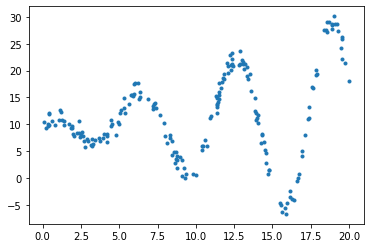

In [157]:
x,y = genarate_data_1d(points=200, min=0, max=20, fn=lambda x: np.cos(x)*x+10, noise=1)
pred_x = np.linspace(start=-2, stop=2, num=200).reshape(200,-1)

plt.plot(x,y,".");

In [158]:
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)
y_scaled = scaler.transform(y.reshape(-1,1))
pred_x_scaled = scaler.transform(pred_x.reshape(-1,1))

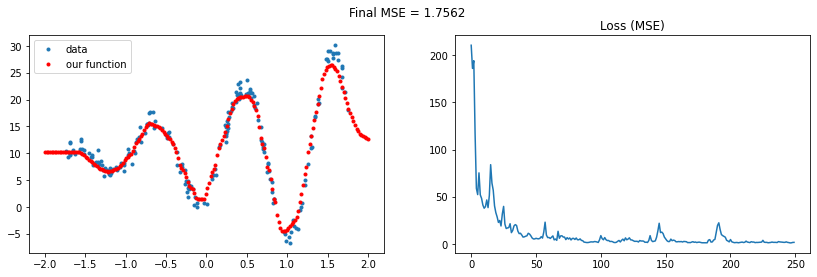

In [179]:
inp = keras.Input(shape=(1,))
hidden = layers.Dense(512, activation='relu')(inp)
hidden = layers.Dense(512, activation='relu')(hidden)
hidden = layers.Dense(512, activation='relu')(hidden)
hidden = layers.Dense(1024, activation='relu')(hidden)
hidden = layers.Dense(1024, activation='relu')(hidden)
hidden = layers.Dense(1024, activation='relu')(hidden)
hidden = layers.Dense(1024, activation='relu')(hidden)
hidden = layers.Dense(1024, activation='relu')(hidden)
hidden = layers.Dense(512, activation='relu')(hidden)
hidden = layers.Dense(512, activation='relu')(hidden)
hidden = layers.Dense(512, activation='relu')(hidden)
hidden = layers.Dense(512, activation='relu')(hidden)


out = layers.Dense(1, name='regression')(hidden)
model = keras.Model(inputs=inp, outputs=out)

model.compile(loss='mse', optimizer=optimizers.Adam(0.005))
hist = model.fit(x_scaled, y, epochs=250, batch_size=32, verbose=0)

pred_y = model.predict(pred_x)

fig, (plot1, plot2) = plt.subplots(1, 2, figsize=(14,4))
fig.suptitle("Final MSE = "+ str(round(hist.history["loss"][-1],4)))
plot(x_scaled, y, pred_x, pred_y, ax=plot1)
plot2.plot(hist.history["loss"]); plot2.set_title("Loss (MSE)");
plt.show()


## LGBM **Regressor**

In [181]:
from lightgbm import LGBMRegressor

In [182]:
lgbm = LGBMRegressor()

In [183]:
lgbm.fit(x_scaled, y)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [185]:
pred_y1 = lgbm.predict(pred_x)

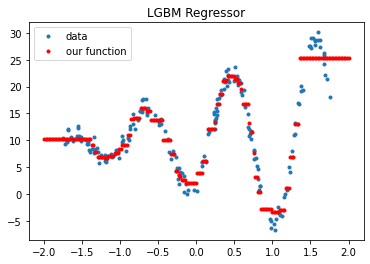

In [190]:
plot(x_scaled, y, pred_x, pred_y1)
plt.title('LGBM Regressor')
plt.show()